In [1]:
# configure python path
import sys
import os
sys.path.append(os.path.abspath('..'))

# configure matplotlib
import matplotlib
matplotlib.rcParams['figure.dpi']= 250
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'png'

from IPython.display import HTML, display, Markdown
from tabulate import tabulate

import pickle
import numpy as np
from source.rel_path import rootDir

from source.compute_attention import *
from source.data_visualization import *

/home/alan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please switch to tf.metrics.auc. Note that the order of the labels and predictions arguments has been switched.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.





channels_last
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 14, 14, 14, 20)    820       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 14, 20)    0         
________________________________________________

In [2]:
y_test_pred = np.argmax(model.predict(x_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

correctPredInd = np.where(y_test_pred == y_test_labels)[0]

testSample0s = np.where(y_test_labels == 0)[0]
testSample1s = np.where(y_test_labels == 1)[0]


# pick samples that are correctly classified
visSample0s = np.intersect1d(correctPredInd, testSample0s)
visSample1s = np.intersect1d(correctPredInd, testSample1s)

print(visSample1s)

[  2   9  17  19  20  22  24  28  32  34  45  57  66  78  87  94  95  97
  98 100 105]


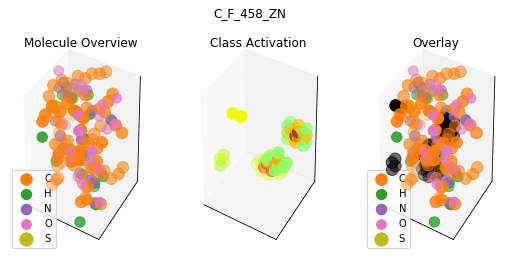

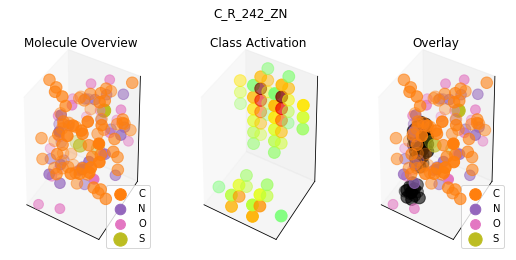

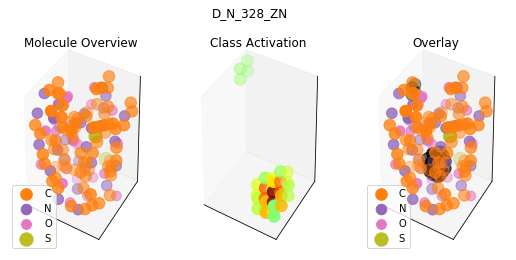

In [3]:
for i in range(3):
    testInd = visSample1s[i]
    fig = plt.figure(figsize=(9, 4))
    axs = [fig.add_subplot(1, 3, i + 1, projection='3d') for i in range(3)]

    pdbqt = get_pdbqt_by_id(ids_test[testInd])
    edges = pdbqt.get_grid_edges(15, 15, 15)
    # show the atom
    plot_atom_3d(axs[0], pdbqt, (15, 15, 15), markerSize=200)
    # show the attention
    attention = visualize_cam1(model, -1, 1, x_test[testInd, ...])
    plot_activation_3d(axs[1], attention, drawThreshold=0.5, markerSize=140, cmap='jet')

    plot_atom_3d(axs[2], pdbqt, (15, 15, 15), markerSize=200)
    plot_activation_3d(axs[2], attention, drawThreshold=0.5, markerSize=140, cmap='jet', overrideColor='black', edges=edges)

    axs[0].set_title('Molecule Overview')
    axs[1].set_title('Class Activation')
    axs[2].set_title('Overlay')

    fig.suptitle(ids_test[testInd])
    plt.show()